In [191]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load dataset 

In [192]:
df = pd.read_csv("used_cars.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Dataset Basic Analysis

In [193]:
# بررسی ویژگی ها , نوع داده های ویژگی و داده های گمشده
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [194]:
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

**بر اساس اطاعات بالا دیتاست ما دارای داده های زیر است :**
- `int` datatype: سه ویژگی
- `float` datatype: یک ویژگی
- `object` datatype: نه ویژگی

In [195]:
# بررسی داده های گمشده و NaN
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

`mileage`, `engine`, `max_power`, `torque`, `seats` دارای داده های گم شده می باشند

In [196]:
df.shape

(8128, 13)

**این دیتاست دارای 13 ویژگی و 8128 نقطه داده ایی می باشد**

In [197]:
# بررسی داده های تکراری
df.duplicated().sum()

1202

In [198]:
# فیلتر کردن داده های تکراری برای بررسی بیشتر
df[(df.duplicated())]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
291,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
296,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
371,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
372,Jaguar XF 2.0 Diesel Portfolio,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,19.33 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


**بر اساس دیتافریم بالا به نظر میاد که داده های تکراری در این دیتاست وجود ندارد , از آنجایی که این دیتاست در خصوص فروش خودرو های کار کرده می باشد , داده های تکراری فقط اطلاعات مشابه به دیگدیگر می باشند**

## بررسی مقادیر ویژگی های دسته ایی

In [199]:
columns = ['fuel', 'seller_type', 'transmission', 'owner']
# for col in df.select_dtypes('object'):
for col in columns:
    print(f"{col} Value Counts: ")
    print(df[col].value_counts())
    print("--------------------------------------------------\n")

fuel Value Counts: 
fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
--------------------------------------------------

seller_type Value Counts: 
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
--------------------------------------------------

transmission Value Counts: 
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
--------------------------------------------------

owner Value Counts: 
owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64
--------------------------------------------------



In [200]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,8128.0,2013.804011,4.044249,1983.0,2011.0,2015.0,2017.0,2020.0
selling_price,8128.0,638271.807702,806253.403508,29999.0,254999.0,450000.0,675000.0,10000000.0
km_driven,8128.0,69819.510827,56550.554958,1.0,35000.0,60000.0,98000.0,2360457.0
seats,7907.0,5.416719,0.959588,2.0,5.0,5.0,5.0,14.0


# Data Cleaning

**در این دیتاست دارای 95 داده از خودرو هایی هستیم که دارای نوع سوخت LPG و CNG هستن**  
**از انجایی که تعداد داده های این نوع خودرو ها زیاد نمی باشد , خودرو هایی که دارای این نوع سوخت هستنند را حذف می کنیم**

In [201]:
df = df[(df['fuel'] != 'CNG') & (df['fuel'] != 'LPG')]
df.reset_index(drop=True, inplace=True)

### `mileage`

**این ستون حاوی میزان سوخت خودرو برای یک لیتر در هر کیلومتر است که در این قسمت قصد دارم این ستون رو به داده های عددی تبدیل کنم**

In [202]:
# حذف kmpl از این ستون
df['mileage'] = df['mileage'].str.replace('kmpl', ' ')
# تغییر نام ستون به نام مشخص تر نسبت به داده های این ویژگی
df.rename(columns={'mileage' : 'mileage_kmpl'}, inplace=True)

In [203]:
# تبدیل نوع داده ها به float
df['mileage_kmpl'] = pd.to_numeric(df['mileage_kmpl'], errors='coerce')
df['mileage_kmpl'] = df['mileage_kmpl'].astype(int, errors='ignore')

# بررسی دیتافریم
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


### `engine`
**این ویژگی هم می بایست دارای نوع داده ایی عددی باشد , بنمابراین می بایست "cc" را از این ویژگی حذف کنیم**

In [204]:
# حذف cc و تغییر داده ها با int
df['engine'] = df['engine'].str.replace('CC', '')
df['engine'] = df['engine'].astype(int, errors='ignore')

# تغییر نام ستون 
df.rename(columns={'engine': 'engine_CC'}, inplace=True)

In [205]:
df['engine_CC'] = pd.to_numeric(df['engine_CC'], errors='coerce')
df['engine_CC'] = df['engine_CC'].astype(int, errors='ignore')

In [206]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_CC,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74 bhp,190Nm@ 2000rpm,5.0


### `max_power`
**برای این ویژگی هم قصد داریم آن را به ویژگی عددی تبدیل کنیم**

In [207]:
# حذف cc و تغییر داده ها با int
df['max_power'] = df['max_power'].str.replace('bhp', '')


# تغییر نام ستون 
df.rename(columns={'max_power': 'max_power_BHP'}, inplace=True)

In [208]:
df['max_power_BHP'] = pd.to_numeric(df['max_power_BHP'], errors='coerce')
df['max_power_BHP'] = df['max_power_BHP'].astype(int, errors='ignore')

### `torque`
**این ستون هم به داده های عددی تبدیل می کنیم**

In [209]:
# # در این قسمت مقادیر گشتاور که بر اساس نانو متر هستن رو استخراج می کنیم و در یک ویژگی جدید ذخیر می کنیم.
# # سپس آن را به نوع داده ایی float تبدیل می کنم
df['torque_Nm'] = df['torque'].str.extract(r'(\d+)Nm')

# استخراج ویژگی rpm 
# این ویژگی مقدار دور در دقیقه برای موتور را نشان می دهد
df['torque_rpm'] = df['torque'].str.extract(r"(\d+)rpm")

In [210]:
# تغییر نوع داده ستون های زیر به نوع داده ایی عددی
df['torque_rpm']  = pd.to_numeric(df['torque_rpm'], errors='coerce')
df['torque_rpm']  = df['torque_rpm'].astype(int, errors='ignore')

In [211]:
df['torque_Nm']  = pd.to_numeric(df['torque_Nm'], errors='coerce')
df['torque_Nm'] = df['torque_Nm'].astype(int, errors='ignore')

In [212]:
# سپس می توانیم ویژگی torque رو این دیتاست حذف کنیم
df.drop('torque', axis=1, inplace=True)

In [213]:
# نمایش نتیجه
df.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_CC,max_power_BHP,seats,torque_Nm,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,190.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,250.0,2500.0


### `seat` 
**نوع داده ایی این ویژگی رو به int تغییر می دهیم**

In [214]:
df['seats'] = df['seats'].astype(int, errors='ignore')

**همچنین میتونیم مقادیر گم شده در این دیتافریم رو به دلیل انکه زیاد نیستن میتوانیم حذف کنیم**

In [215]:
df.dropna(inplace=True)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6875 entries, 0 to 8032
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6875 non-null   object 
 1   year           6875 non-null   int64  
 2   selling_price  6875 non-null   int64  
 3   km_driven      6875 non-null   int64  
 4   fuel           6875 non-null   object 
 5   seller_type    6875 non-null   object 
 6   transmission   6875 non-null   object 
 7   owner          6875 non-null   object 
 8   mileage_kmpl   6875 non-null   float64
 9   engine_CC      6875 non-null   float64
 10  max_power_BHP  6875 non-null   float64
 11  seats          6875 non-null   float64
 12  torque_Nm      6875 non-null   float64
 13  torque_rpm     6875 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 805.7+ KB


# Exploratory Data Analysis & Feature Engineering

**در این قسمت دیتاست رو با توجه به معیار های آماری بررسی میکنیم**  


**در صورتی که امکان ایجاد و استخراج ویژگی نیز وجود داشته باشد , انجام میدهیم**

### بررسی ویژگی `name`

In [217]:
# در این قسمت 10 تا بیشترین نام خودرو ها رو در این دیتاست پیدا می کنیم و نمودار آن را نیز رسم می کنیم
top_cars = df.groupby('name').size().sort_values(ascending=False).reset_index().head(10)
top_cars.rename(columns={0: 'count'}, inplace=True)

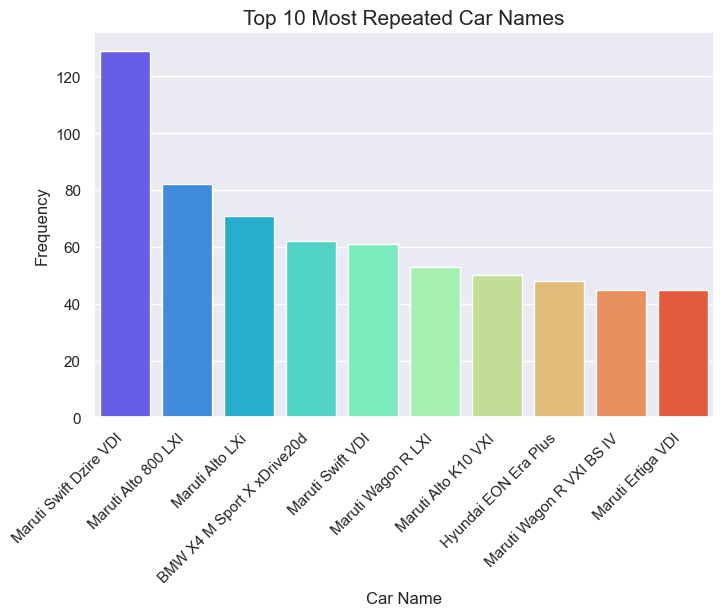

In [218]:
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.barplot(data=top_cars, x='name', y='count', palette='rainbow')
plt.title("Top 10 Most Repeated Car Names", fontsize=15)
plt.xlabel("Car Name", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### بررسی ویژگی `fuel`

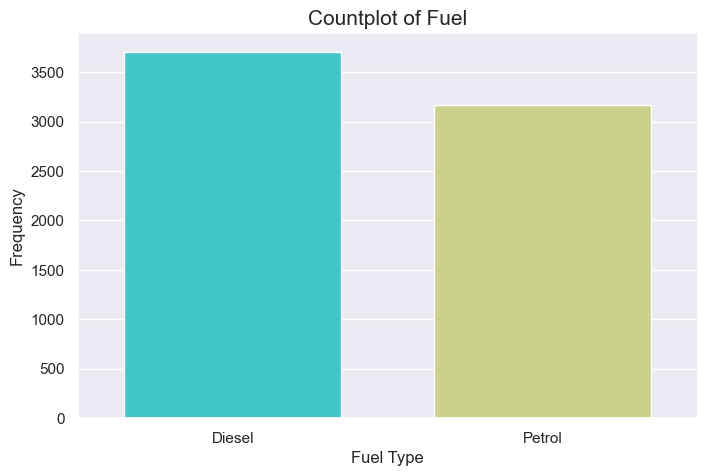

In [219]:
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.countplot(data=df, x='fuel', palette='rainbow', width=0.7)
plt.title("Countplot of Fuel", fontsize=15)
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

### بررسی ویژگی `year`

**در این بخش تعداد ماشین های این دیتاست بر اساس سال ساخت آنها رسم کردیم**

In [220]:
cars_by_year = df.groupby('year')['name'].count().to_frame().reset_index()
cars_by_year.tail()

,year,name
22,2016,839
23,2017,929
24,2018,717
25,2019,487
26,2020,59


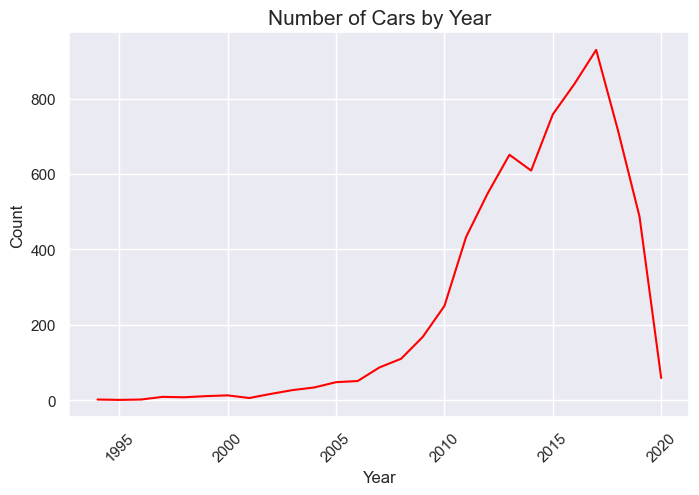

In [221]:
plt.figure(figsize=(8, 5))
sns.set_style('darkgrid')
sns.lineplot(data=cars_by_year, x='year', y='name', color='red', )
plt.title("Number of Cars by Year", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.show()

این ستون نشان دهنده سال ساخت خودرو می باشد 
در این قسمت سال ساخت رو به سن خودرو تغییر می دهیم

In [222]:
from datetime import datetime

In [223]:
df['age'] = datetime.today().year - df['year']

سپس میتوانیم هیستوگرام ستون سن را رسم کنیم

<function matplotlib.pyplot.show(close=None, block=None)>

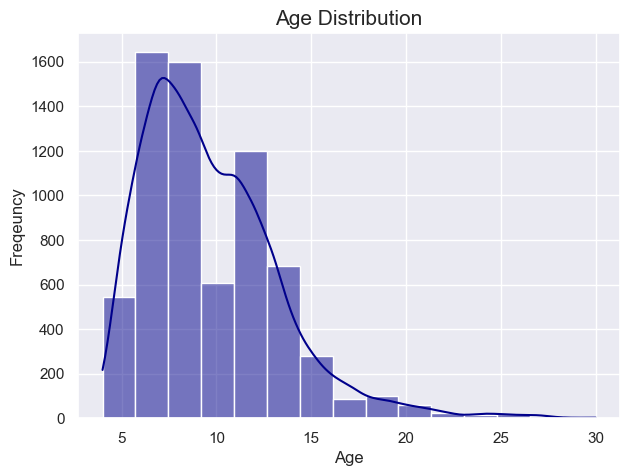

In [224]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.histplot(data=df, x='age', color='darkblue', bins=15, kde=True)
plt.title("Age Distribution", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Freqeuncy", fontsize=12)
plt.show

*حذف ستون `year`*

In [225]:
df.drop('year', axis=1, inplace=True)

### بررسی ویژگی `selling_price`

<function matplotlib.pyplot.show(close=None, block=None)>

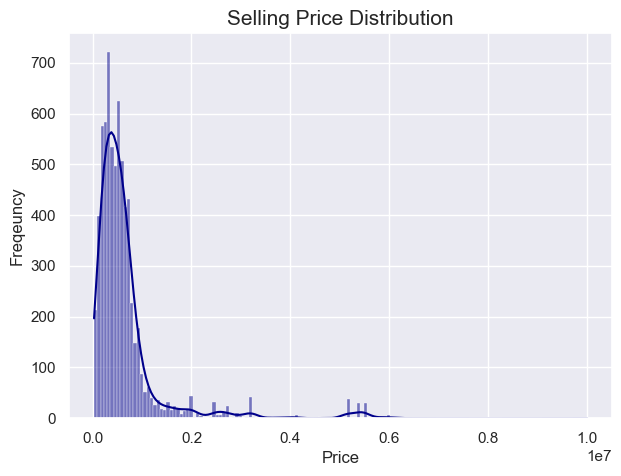

In [226]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.histplot(data=df, x='selling_price', color='darkblue', bins=150, kde=True)
plt.title("Selling Price Distribution", fontsize=15)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Freqeuncy", fontsize=12)
plt.show

In [227]:
# بررسی چولگی و کورتوسیس ستون selling_price
skew = df['selling_price'].skew()
kurt = df['selling_price'].kurt()
mean = df['selling_price'].mean()
median = df['selling_price'].median()
range = np.ptp(df['selling_price'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: 4.2544
Kurtosis: 21.8125
Mean: 665186.9412
Median: 480000.0000
Range: 9970001


### بررسی ویژگی `km_driven`

<function matplotlib.pyplot.show(close=None, block=None)>

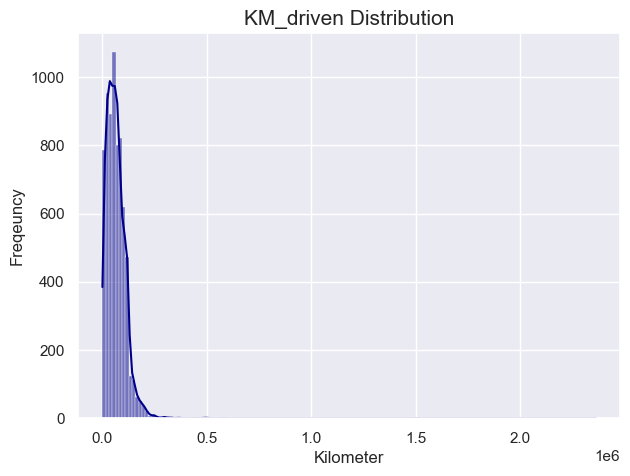

In [228]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.histplot(data=df, x='km_driven', color='darkblue', bins=150, kde=True)
plt.title("KM_driven Distribution", fontsize=15)
plt.xlabel("Kilometer", fontsize=12)
plt.ylabel("Freqeuncy", fontsize=12)
plt.show

In [229]:
# بررسی چولگی و کورتوسیس ستون km_driven
skew = df['km_driven'].skew()
kurt = df['km_driven'].kurt()
mean = df['km_driven'].mean()
median = df['km_driven'].median()
range = np.ptp(df['km_driven'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: 13.7149
Kurtosis: 495.0514
Mean: 66159.4173
Median: 60000.0000
Range: 2359457


### بررسی ویژگی `seller_type`

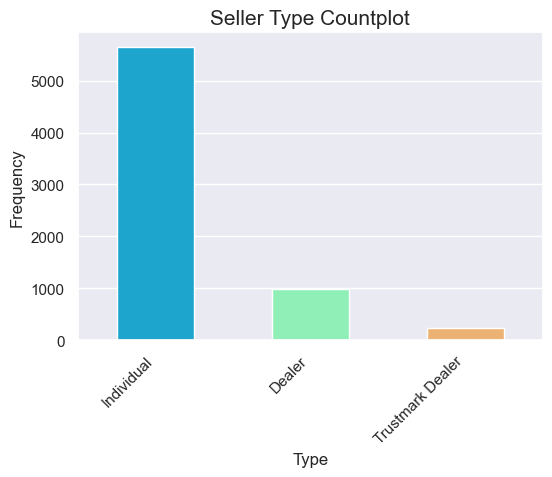

In [230]:
plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
sns.countplot(data=df, x='seller_type', palette='rainbow', width=0.5)
plt.title("Seller Type Countplot", fontsize=15)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### بررسی ویژگی `transmission`

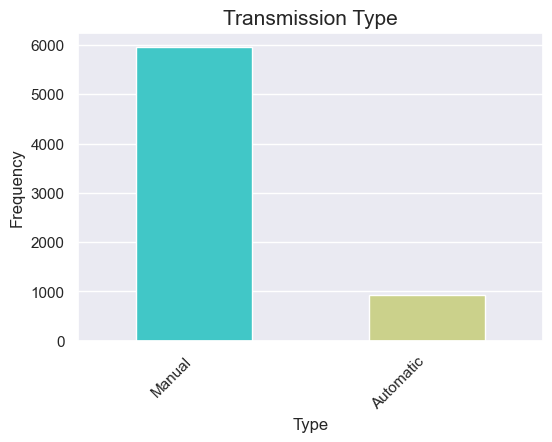

In [231]:
plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
sns.countplot(data=df, x='transmission', palette='rainbow', width=0.5)
plt.title("Transmission Type", fontsize=15)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### بررسی ویژگی `owner`

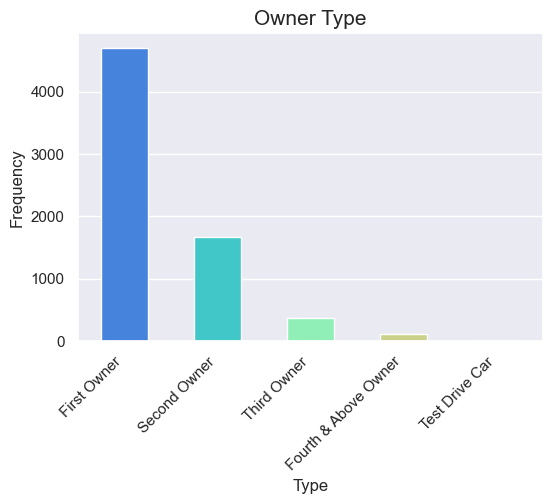

In [232]:
plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
sns.countplot(data=df, x='owner', palette='rainbow', width=0.5)
plt.title("Owner Type", fontsize=15)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### بررسی ویژگی `mileage_kmpl`

<function matplotlib.pyplot.show(close=None, block=None)>

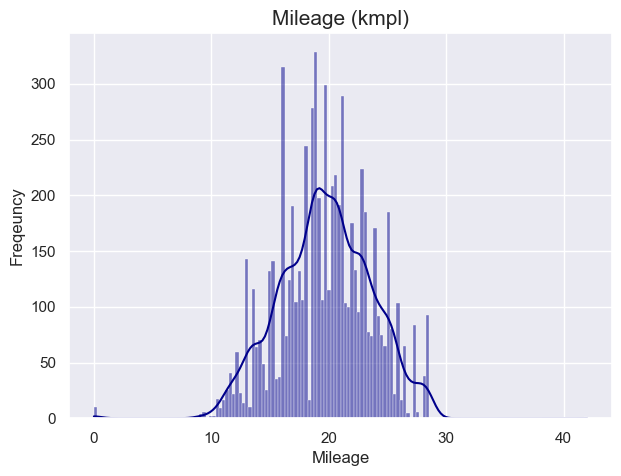

In [233]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.histplot(data=df, x='mileage_kmpl', color='darkblue', bins=150, kde=True)
plt.title("Mileage (kmpl)", fontsize=15)
plt.xlabel("Mileage", fontsize=12)
plt.ylabel("Freqeuncy", fontsize=12)
plt.show

In [234]:
# بررسی چولگی و کورتوسیس ستون mileage_kmpl
skew = df['mileage_kmpl'].skew()
kurt = df['mileage_kmpl'].kurt()
mean = df['mileage_kmpl'].mean()
median = df['mileage_kmpl'].median()
range = np.ptp(df['mileage_kmpl'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: -0.1741
Kurtosis: 0.4710
Mean: 19.7112
Median: 19.7000
Range: 42.0


### بررسی ویژگی `engine_CC`

<function matplotlib.pyplot.show(close=None, block=None)>

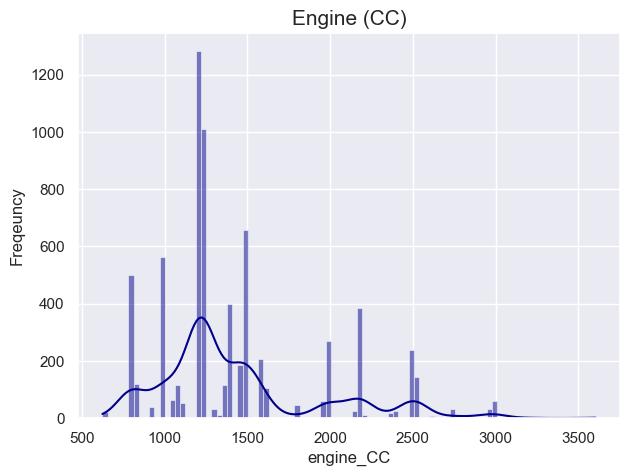

In [235]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.histplot(data=df, x='engine_CC', color='darkblue', bins='auto', kde=True)
plt.title("Engine (CC)", fontsize=15)
plt.xlabel("engine_CC", fontsize=12)
plt.ylabel("Freqeuncy", fontsize=12)
plt.show

In [236]:
# بررسی چولگی و کورتوسیس ستون engine_CC
skew = df['engine_CC'].skew()
kurt = df['engine_CC'].kurt()
mean = df['engine_CC'].mean()
median = df['engine_CC'].median()
range = np.ptp(df['engine_CC'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: 1.2042
Kurtosis: 1.0215
Mean: 1436.6061
Median: 1248.0000
Range: 2980.0


### بررسی ویژگی `max_power_BHP`

<function matplotlib.pyplot.show(close=None, block=None)>

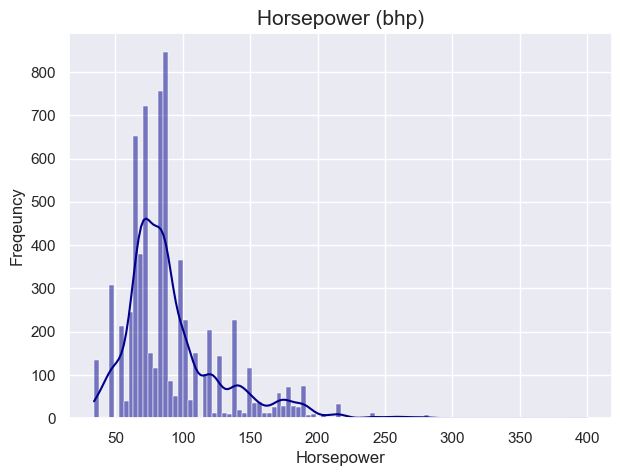

In [237]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.histplot(data=df, x='max_power_BHP', color='darkblue', bins=100, kde=True)
plt.title("Horsepower (bhp)", fontsize=15)
plt.xlabel("Horsepower", fontsize=12)
plt.ylabel("Freqeuncy", fontsize=12)
plt.show

In [238]:
# بررسی چولگی و کورتوسیس ستون max_power_BHP
skew = df['max_power_BHP'].skew()
kurt = df['max_power_BHP'].kurt()
mean = df['max_power_BHP'].mean()
median = df['max_power_BHP'].median()
range = np.ptp(df['max_power_BHP'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: 1.6392
Kurtosis: 3.8264
Mean: 91.7312
Median: 82.4000
Range: 365.8


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6875 entries, 0 to 8032
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6875 non-null   object 
 1   selling_price  6875 non-null   int64  
 2   km_driven      6875 non-null   int64  
 3   fuel           6875 non-null   object 
 4   seller_type    6875 non-null   object 
 5   transmission   6875 non-null   object 
 6   owner          6875 non-null   object 
 7   mileage_kmpl   6875 non-null   float64
 8   engine_CC      6875 non-null   float64
 9   max_power_BHP  6875 non-null   float64
 10  seats          6875 non-null   float64
 11  torque_Nm      6875 non-null   float64
 12  torque_rpm     6875 non-null   float64
 13  age            6875 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 805.7+ KB


### بررسی ویژگی `seats`

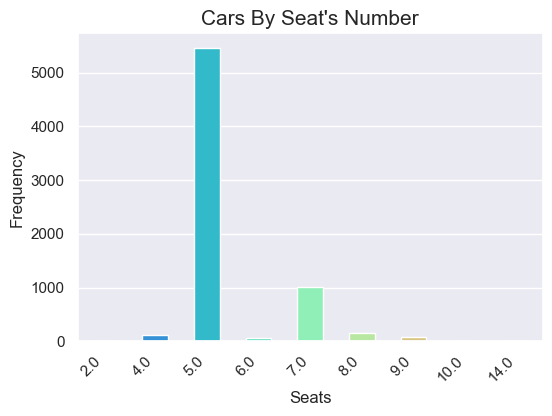

In [240]:
plt.figure(figsize=(6, 4))
sns.set_style('darkgrid')
sns.countplot(data=df, x='seats', palette='rainbow', width=0.5)
plt.title("Cars By Seat's Number", fontsize=15)
plt.xlabel("Seats", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

### بررسی ویژگی `torque_nm`

<function matplotlib.pyplot.show(close=None, block=None)>

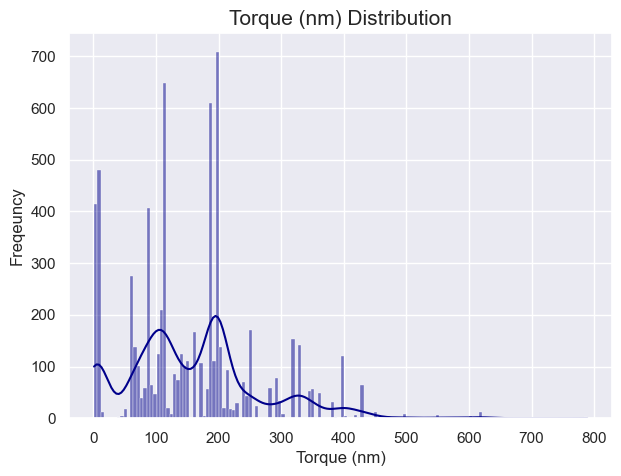

In [241]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.histplot(data=df, x='torque_Nm', color='darkblue', bins=150, kde=True)
plt.title("Torque (nm) Distribution", fontsize=15)
plt.xlabel("Torque (nm)", fontsize=12)
plt.ylabel("Freqeuncy", fontsize=12)
plt.show

In [242]:
# بررسی چولگی و کورتوسیس ستون torque_Nm
skew = df['torque_Nm'].skew()
kurt = df['torque_Nm'].kurt()
mean = df['torque_Nm'].mean()
median = df['torque_Nm'].median()
range = np.ptp(df['torque_Nm'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: 0.8624
Kurtosis: 1.3972
Mean: 158.0838
Median: 146.0000
Range: 788.0


### بررسی ویژگی `torque_rpm`

<function matplotlib.pyplot.show(close=None, block=None)>

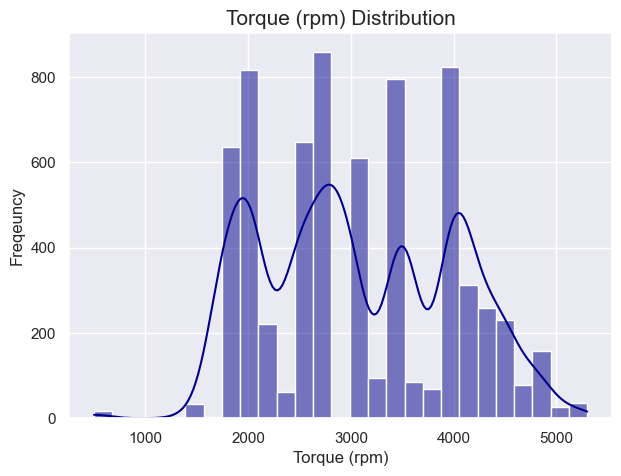

In [243]:
plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.histplot(data=df, x='torque_rpm', color='darkblue', bins='auto', kde=True)
plt.title("Torque (rpm) Distribution", fontsize=15)
plt.xlabel("Torque (rpm)", fontsize=12)
plt.ylabel("Freqeuncy", fontsize=12)
plt.show

In [244]:
# بررسی چولگی و کورتوسیس ستون torque_rpm
skew = df['torque_rpm'].skew()
kurt = df['torque_rpm'].kurt()
mean = df['torque_rpm'].mean()
median = df['torque_rpm'].median()
range = np.ptp(df['torque_rpm'])

# Show results
print(f"Skewness: {skew:.4f}")
print(f"Kurtosis: {kurt:.4f}")
print(f"Mean: {mean:.4f}")
print(f"Median: {median:.4f}")
print(f"Range: {range}")

Skewness: 0.1517
Kurtosis: -0.9907
Mean: 3074.4561
Median: 3000.0000
Range: 4800.0


*در این قسمت تعدادی ویژگی جدید ایجاد می کنیم که ممکن است همبستگی با ستون هدف داشته باشد*

In [245]:
# نسبت اسب بخار به حجم موتور
df['bhp_to_engineCC_ratio'] = df['max_power_BHP'] / df['engine_CC']

In [246]:
# نسبت اسب بخار و دور موتور و گشتاور
df['bhp_to_torque_rpm'] = df['max_power_BHP'] / df['torque_rpm']

In [247]:
# نسبت مبلغ به مصرف سوخت
df['price_to_mileage'] = df['selling_price'] / df['mileage_kmpl']

In [248]:
# نسبت مبلغ فروش به مقدار کیلومتر خودرو
df['price_to_km'] = df['selling_price'] / df['km_driven']

In [249]:
df.head(1)

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage_kmpl,engine_CC,max_power_BHP,seats,torque_Nm,torque_rpm,age,bhp_to_engineCC_ratio,bhp_to_torque_rpm,price_to_mileage,price_to_km
0,Maruti Swift Dzire VDI,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,5.0,190.0,2000.0,10,0.059295,0.037,19230.769231,3.092784


# Data Encoding 
**تبدیل مقادیر دسته ایی به عددی و کدگذاری آنها**
در این قسمت ویژگی های زیر رو به صورت one-hot کد گذاری می کنیم
- `fuel`, `seller_type`, `transmission`

In [250]:
df = pd.get_dummies(df, columns=['fuel', 'seller_type', 'transmission'], dtype='int')
df.head(1)

,name,selling_price,km_driven,owner,mileage_kmpl,engine_CC,max_power_BHP,seats,torque_Nm,torque_rpm,...,bhp_to_torque_rpm,price_to_mileage,price_to_km,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,Maruti Swift Dzire VDI,450000,145500,First Owner,23.4,1248.0,74.0,5.0,190.0,2000.0,...,0.037,19230.769231,3.092784,1,0,0,1,0,0,1


In [251]:
# کد گداری ویژگی owner
df['owner'] = df['owner'].map({
    'First Owner' : 5,
    'Second Owner': 4,
    'Third Owner' : 3,
    'Fourth & Above Owner': 2,
    'Test Drive Car': 1
})

*ایجاد ویژگی جدید و محاسبه نسبت مبلغ خودرو به تعداد صاحبین قبلی*

In [252]:
# نسبت مبلغ به صاحبین خودرو
df['price_to_owner_ratio'] = (df['selling_price'] / (df['owner'] + 1)).astype(int)

# Bivariate Analaysis
**بررسی ویژگی های مهمی که ممکن است با ویژگی هدف همبستگی داشته باشد**

In [253]:
"""
این تابع، با استفاده از کتابخانه‌های seaborn و matplotlib، یک نمودار scatter plot را برای دو ویژگی x و y از یک DataFrame رسم می‌کند و همچنین یک خط رگرسیون (regression line) را برای نمایش رابطه‌ی تقریبی بین این دو ویژگی اضافه می‌کند.
"""

def regplot(x, y):
    plt.figure(figsize=(7, 6))
    sns.set(style='darkgrid')
    sns.regplot(data=df, x=x, y=y, line_kws={"color":"red"}, color='blue')
    plt.title(f"{x} Vs {y}", fontsize=15)
    plt.xlabel(f"{x}", fontsize=12)
    plt.ylabel(f"{y}", fontsize=12)
    plt.show()

## `selling_price` Vs `year`

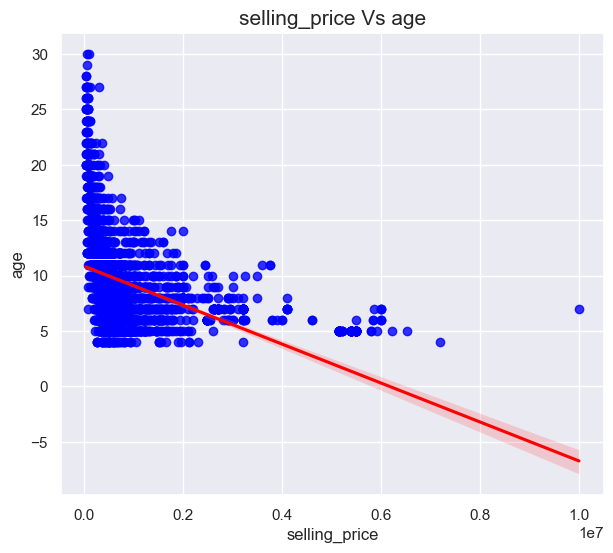

In [254]:
regplot('selling_price', 'age')

## `selling_price` Vs `km_driven`

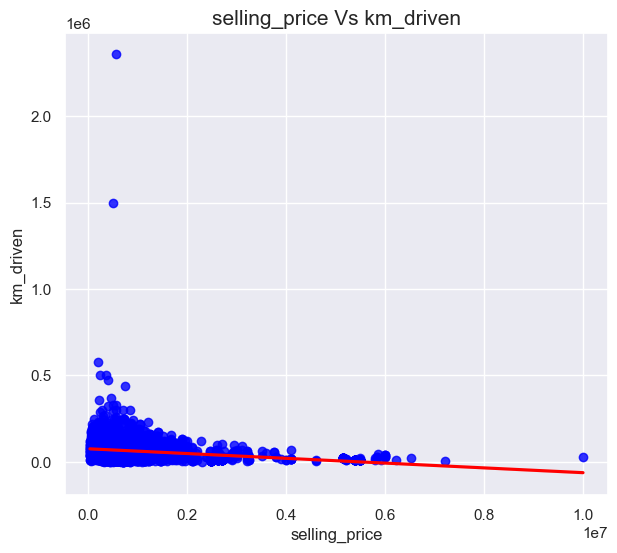

In [255]:
regplot('selling_price', 'km_driven')

## `selling_price` Vs `mileage_kmpl`

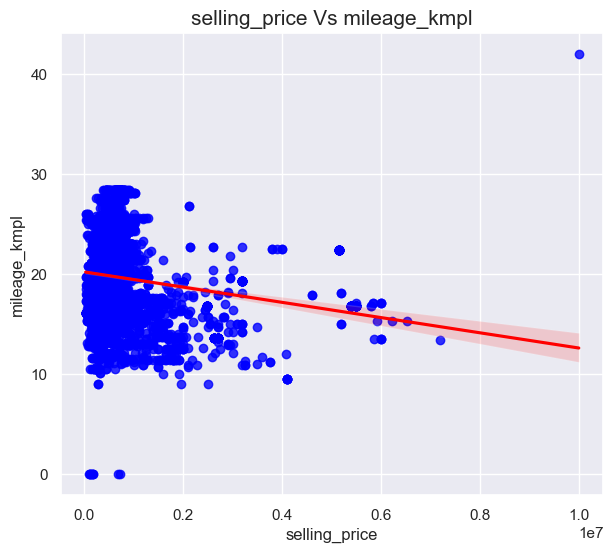

In [256]:
regplot('selling_price', 'mileage_kmpl')

## `selling_price` Vs `engine_CC`

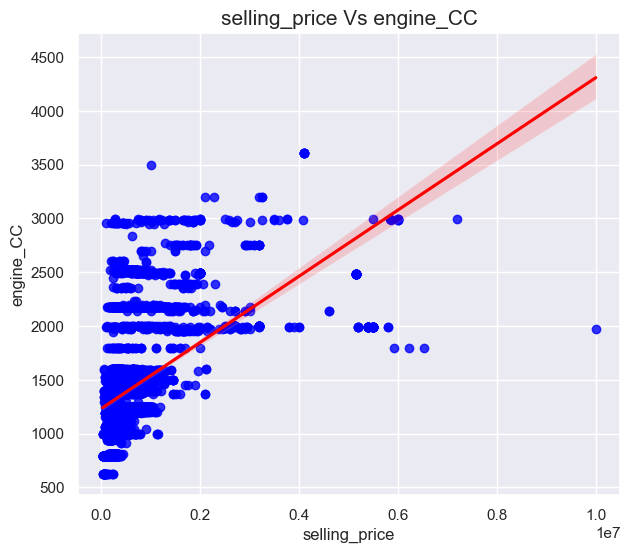

In [257]:
regplot('selling_price', 'engine_CC')

## `selling_price` Vs `max_power_BHP`

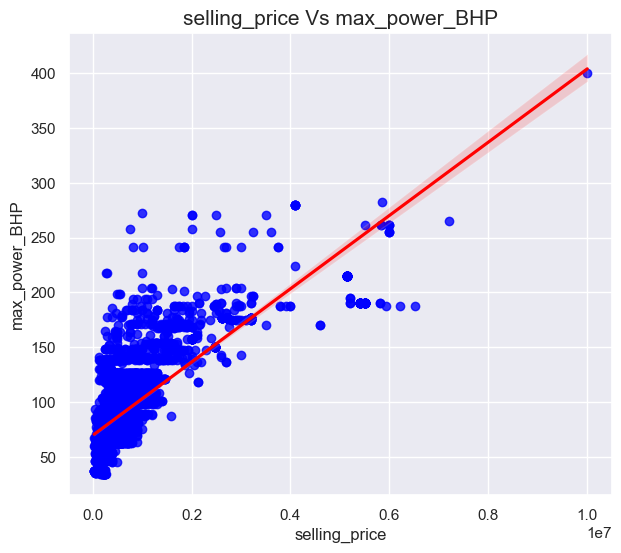

In [258]:
regplot('selling_price', 'max_power_BHP')

## `selling_price` Vs `torque_Nm`

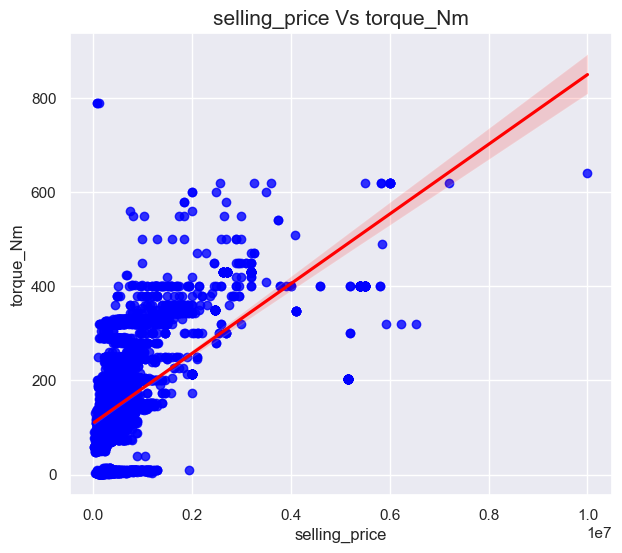

In [259]:
regplot('selling_price', 'torque_Nm')

## `selling_price` Vs `age`

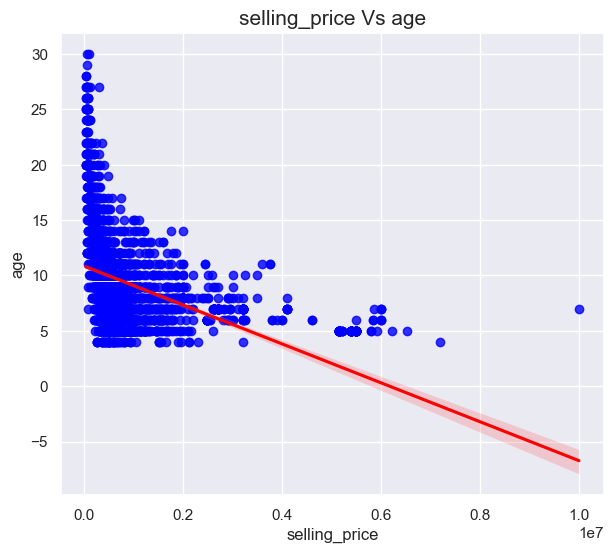

In [260]:
regplot('selling_price', 'age')

## `selling_price` Vs `bhp_to_engineCC_ratio`

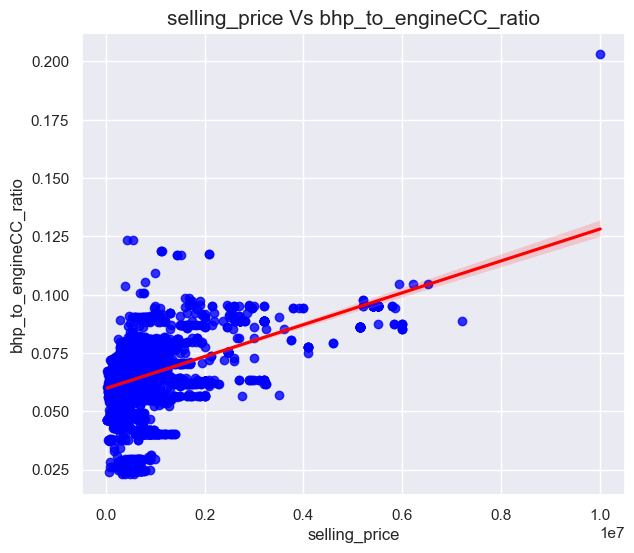

In [261]:
regplot("selling_price", "bhp_to_engineCC_ratio")

## `selling_price` Vs `bhp_to_engineCC_ratio`

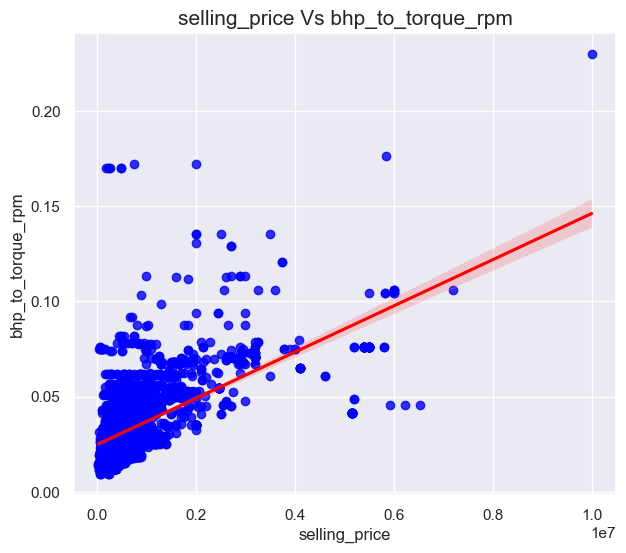

In [262]:
regplot("selling_price", 'bhp_to_torque_rpm')

## `selling_price` Vs `price_to_mileage`

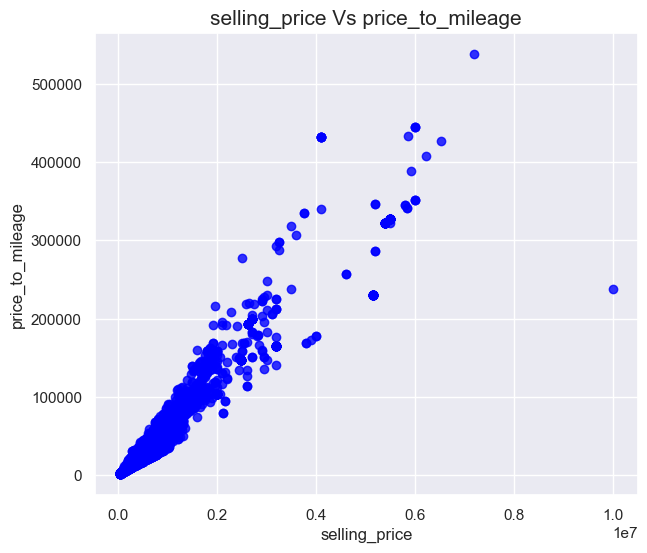

In [263]:
regplot("selling_price", "price_to_mileage")

## `selling_price` Vs `price_to_km`

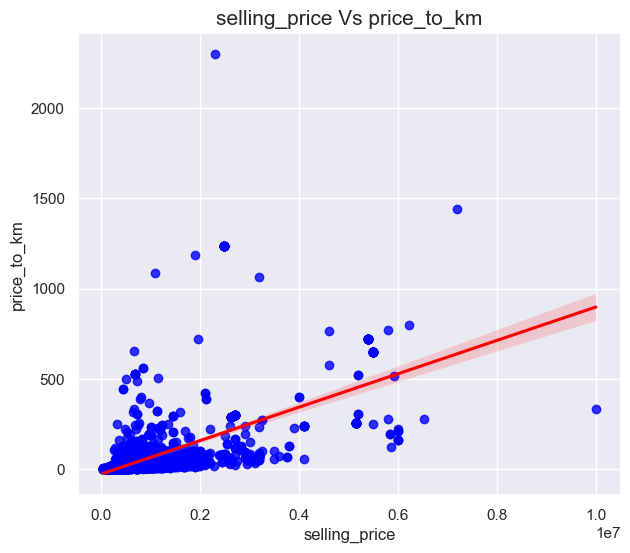

In [264]:
regplot('selling_price', 'price_to_km')

## `selling_price` Vs `price_to_owner_ratio`

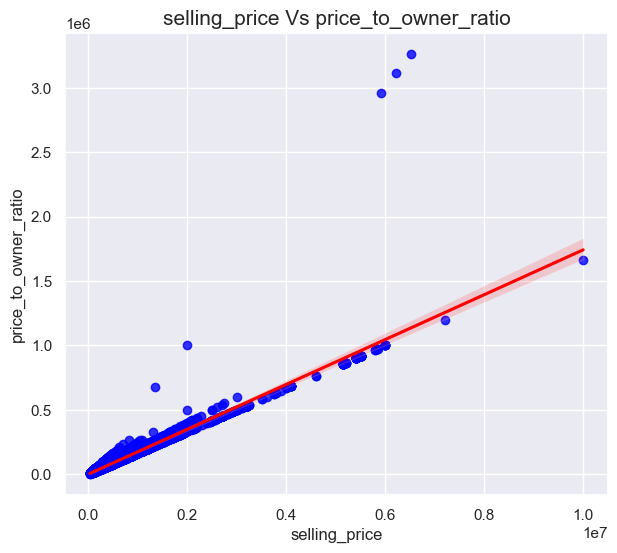

In [265]:
regplot("selling_price", "price_to_owner_ratio")

# Detect and Handling Of Outliers

*بررسی ویژگی های عددی و حذف داده های پر از آنها*

In [266]:
def remove_outliers(df, column_name):
    """ این تابع نام ستون و دیتافریم را به عنوان ورودی دریافت میکند , 
    سپس داده های پرت را بر اساس متد IQR حذف می کند."""
    Q1 = np.quantile(df[column_name], 0.25)
    Q3 = np.quantile(df[column_name], 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

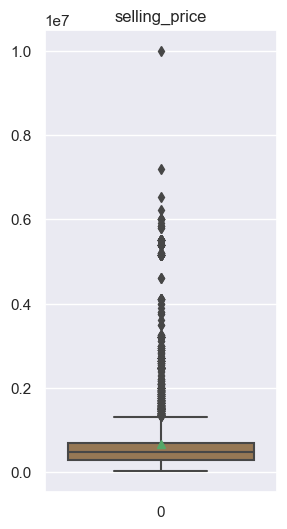

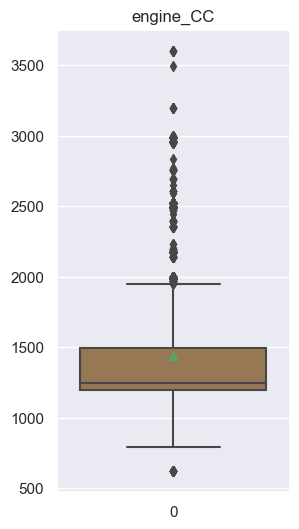

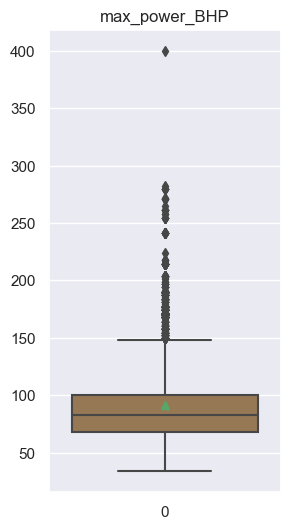

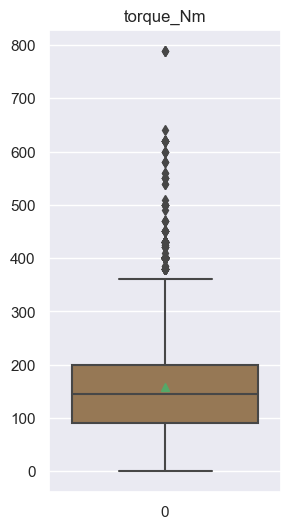

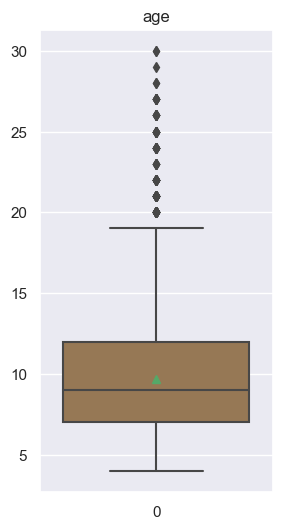

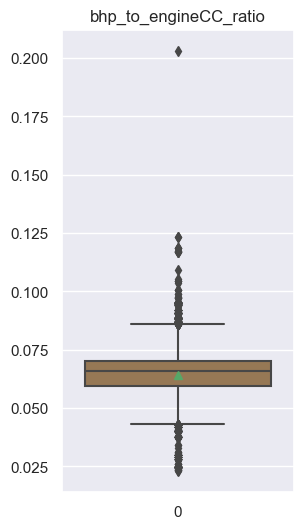

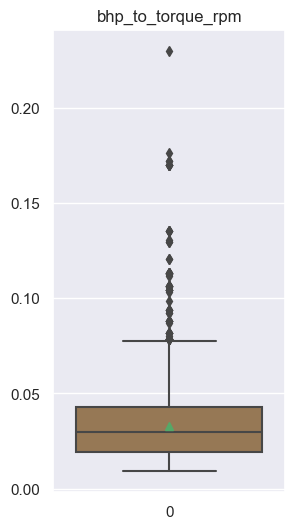

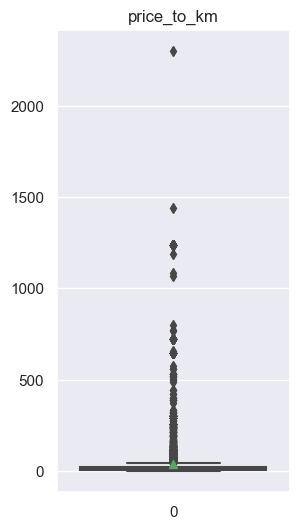

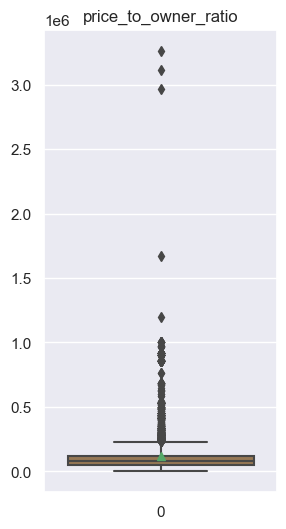

In [267]:
columns = ['selling_price',
       'engine_CC', 'max_power_BHP', 'torque_Nm', 'age',
       'bhp_to_engineCC_ratio', 'bhp_to_torque_rpm',
       'price_to_km', 'price_to_owner_ratio']
for col in columns:
    plt.figure(figsize=(3, 6))
    sns.boxplot(df[col], showmeans=True, palette='cubehelix')
    plt.title(f"{col}")
    plt.show()

In [268]:
# ارسال ستون های عددی به تابع outlier
# و حذف داده های پرت
for col in columns:
    df = remove_outliers(df, col)

# ریست کردن ایندکس دیتافریم به دلیل حذف تعدادی از داده های پرت

df.reset_index(inplace=True, drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4486 entries, 0 to 4485
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          4486 non-null   object 
 1   selling_price                 4486 non-null   int64  
 2   km_driven                     4486 non-null   int64  
 3   owner                         4486 non-null   int64  
 4   mileage_kmpl                  4486 non-null   float64
 5   engine_CC                     4486 non-null   float64
 6   max_power_BHP                 4486 non-null   float64
 7   seats                         4486 non-null   float64
 8   torque_Nm                     4486 non-null   float64
 9   torque_rpm                    4486 non-null   float64
 10  age                           4486 non-null   int64  
 11  bhp_to_engineCC_ratio         4486 non-null   float64
 12  bhp_to_torque_rpm             4486 non-null   float64
 13  pri

# Correlation Heatmap

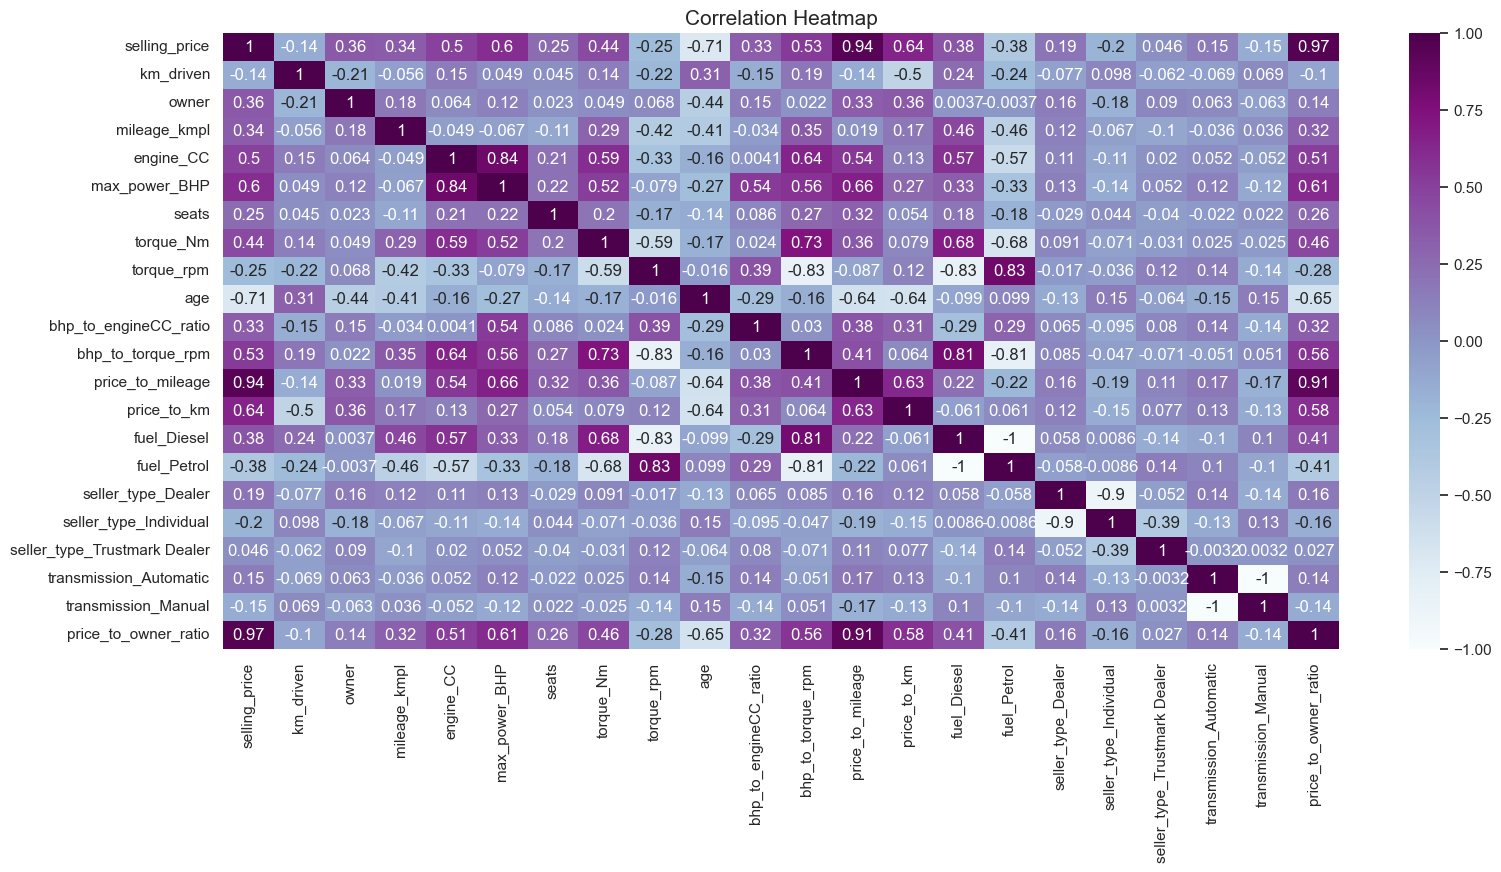

In [269]:
df_corr = df.corr(numeric_only=True)

plt.figure(figsize=(18,8))
sns.heatmap(data=df_corr, cmap='BuPu', annot=True)
plt.title("Correlation Heatmap", fontsize=15)
plt.show()

# Data Scaling

In [270]:
# انتخاب ستون های لازم برای مدل سازی
df_standard = df[['selling_price',
       'engine_CC', 'max_power_BHP', 'torque_Nm', 'age',
       'bhp_to_engineCC_ratio', 'bhp_to_torque_rpm',
       'price_to_km', 'price_to_owner_ratio', 'fuel_Diesel', 'fuel_Petrol',
       'seller_type_Dealer', 'seller_type_Individual', 'transmission_Automatic',
       'transmission_Manual']].copy()
df_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4486 entries, 0 to 4485
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   selling_price           4486 non-null   int64  
 1   engine_CC               4486 non-null   float64
 2   max_power_BHP           4486 non-null   float64
 3   torque_Nm               4486 non-null   float64
 4   age                     4486 non-null   int64  
 5   bhp_to_engineCC_ratio   4486 non-null   float64
 6   bhp_to_torque_rpm       4486 non-null   float64
 7   price_to_km             4486 non-null   float64
 8   price_to_owner_ratio    4486 non-null   int32  
 9   fuel_Diesel             4486 non-null   int32  
 10  fuel_Petrol             4486 non-null   int32  
 11  seller_type_Dealer      4486 non-null   int32  
 12  seller_type_Individual  4486 non-null   int32  
 13  transmission_Automatic  4486 non-null   int32  
 14  transmission_Manual     4486 non-null   

In [271]:
df_standard.head()

,selling_price,engine_CC,max_power_BHP,torque_Nm,age,bhp_to_engineCC_ratio,bhp_to_torque_rpm,price_to_km,price_to_owner_ratio,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,450000,1248.0,74.00,190.0,10,0.059295,0.037000,3.092784,75000,1,0,0,1,0,1
1,370000,1498.0,103.52,250.0,10,0.069105,0.041408,3.083333,74000,1,0,0,1,0,1
2,350000,1364.0,67.10,170.0,13,0.049194,0.027958,3.888889,58333,1,0,0,1,0,1
3,200000,1399.0,68.10,160.0,11,0.048678,0.034050,1.183432,33333,1,0,0,1,0,1
4,500000,1461.0,108.45,248.0,10,0.074230,0.048200,7.352941,100000,1,0,0,1,0,1


In [272]:
# کتابخانه های لازم برای استانداردسازی
from sklearn.preprocessing import StandardScaler

In [273]:
# ایجاد یک نمونه از کلاس standardscaler
scaler = StandardScaler()
columns = ['selling_price', 'engine_CC', 'max_power_BHP', 'torque_Nm', 'age', 
           'bhp_to_engineCC_ratio', 'bhp_to_torque_rpm', 'price_to_km', 'price_to_owner_ratio']
# استاندارد سازی ویژگی ها
for col in columns:
    df_standard[col] = scaler.fit_transform(df_standard[[col]])

In [274]:
df_standard.head(1)

,selling_price,engine_CC,max_power_BHP,torque_Nm,age,bhp_to_engineCC_ratio,bhp_to_torque_rpm,price_to_km,price_to_owner_ratio,fuel_Diesel,fuel_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,0.163902,0.18665,-0.211243,0.895601,0.036665,-0.710244,0.763555,-0.770632,0.029508,1,0,0,1,0,1


# ذخیره داده های پیش پردازش شده در فایل دیتاست جدید

In [275]:
df_standard.to_csv("used_cars_preprocessed.csv", index=False)